In [436]:
# %matplotlib inline
from BallHeaterDriver import BallHeaterDriver
import time
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from list_ports import list_ports

from pathlib import Path

data_dir = Path("test_data")


def plot_log_file(log_file_path):
    df = pd.read_csv(log_file_path)
    df["time"] = df["time"] - df["time"][0]
    fig, ax = plt.subplots(2, 1, sharex=True)
    sns.lineplot(data=df, x="time", y="target_temp", label="target", ax=ax[0])
    sns.lineplot(data=df, x="time", y="heater_temp", label="heater", ax=ax[0])
    sns.lineplot(data=df, x="time", y="ball_heater_pwm", label="heater PWM", ax=ax[1])
    ax[0].set(ylabel="Temperature (°C)")
    ax[1].set(ylabel="Heater PWM (%)", xlabel="Time (s)")
    search_r = re.search(r"kp_([\d\.]+)_ki_([\d\.]+)_kd_([\d\.]+)", log_file_path.name)
    kp, ki, kd = search_r.groups() if search_r is not None else (0, 0, 0)
    fig.suptitle(f"kp:{kp}, ki:{ki}, kd:{kd}")
    return fig, ax

# fig, axs =  plot_log_file(filename)

In [2]:
# ports = list_ports()
ports = [port for port in list_ports() if   port['manufacturer'] is not None and 'Silicon Labs' in  port['manufacturer']]
port = ports[0]['port']
port
ball_heater = BallHeaterDriver(port = port)

In [453]:
ball_heater.stop_logging()
ball_heater.send_command('set_target_temp', [20])


(True, b'')

In [440]:
kp, ki, kd = 120, .2, 0.1
ball_heater.send_command('set_pid_parameters', [kp, ki, kd])
print('set', ball_heater.send_command('return_pid_parameters'))
filename = data_dir / f'pid_test_kp_{kp}_ki_{ki}_kd_{kd}_{time.strftime("%Y-%m-%d_%H-%M-%S")}.csv'
print(filename) 

set (True, {'kp': 120.0, 'ki': 0.20000000298023224, 'kd': 0.10000000149011612})
test_data/pid_test_kp_120_ki_0.2_kd_0.1_2023-10-25_18-41-37.csv


In [414]:
filename = data_dir/'manual_test.csv'
ball_heater.send_command('set_control_mode', [1])

(True, b'')

In [441]:
ball_heater.begin_logging(log_file_path=filename, log_interval = 1)
time.sleep(2)
ball_heater.send_command('set_target_temp', [35])

(True, b'')

[(30.0, 40.0)]

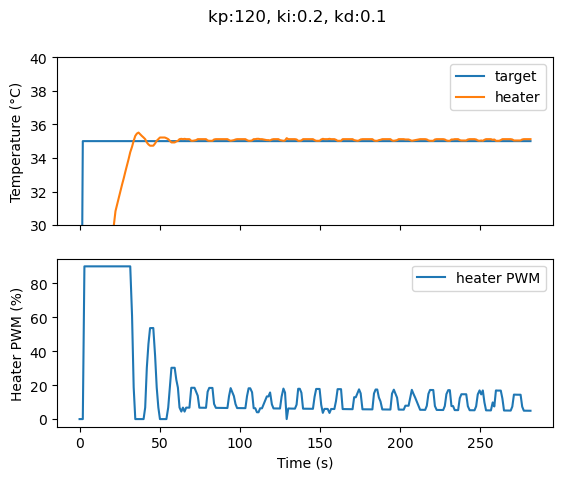

In [452]:
fig, axs = plot_log_file(filename)
axs[0].set(ylim=(30, 40))
# axs[0].set(ylim=(34, 36))

# axs[0].set(xlim=(1150, 1450),ylim=(34, 36))

# axs[0].set(xlim=(800,900),ylim=(34, 36))
# axs[0].set(xlim=(0, 100))


# plt.ylim(25, 40)

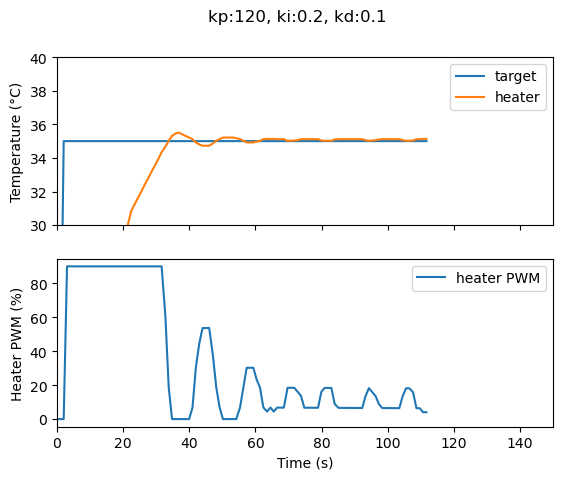

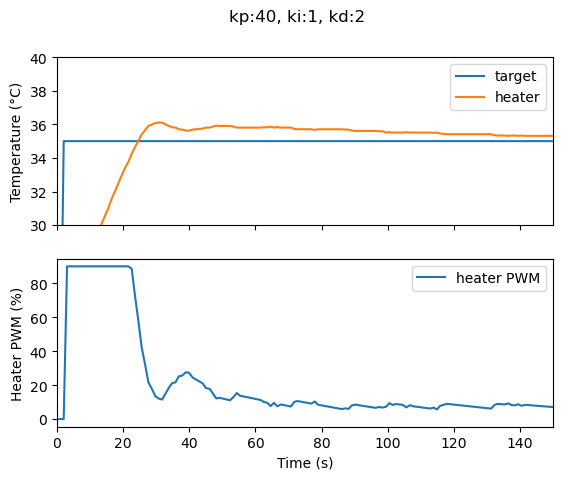

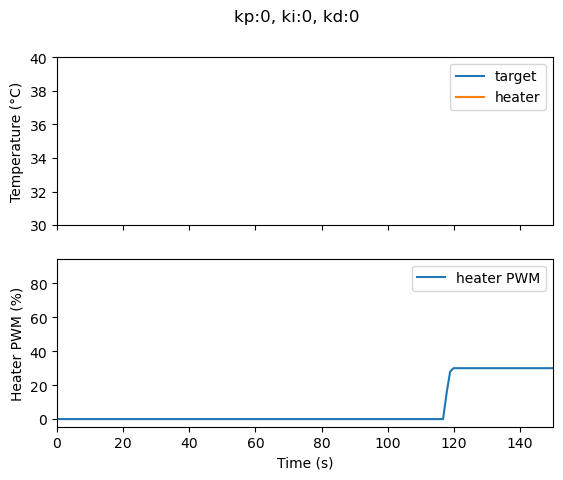

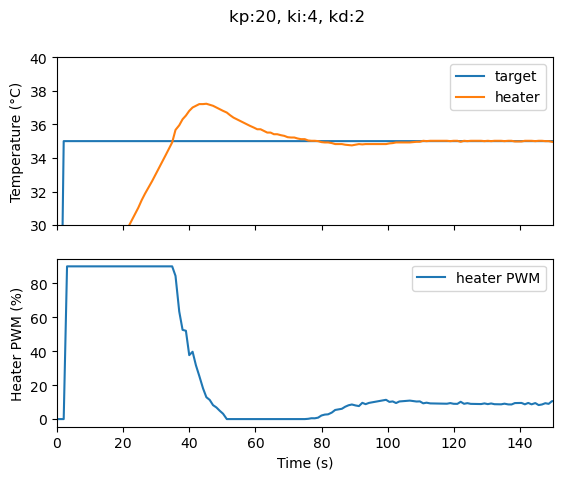

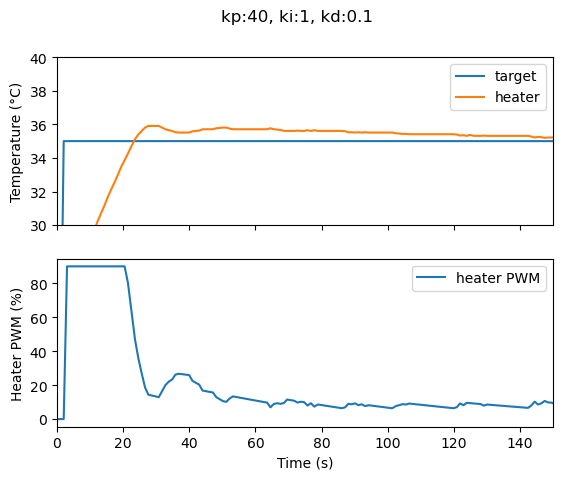

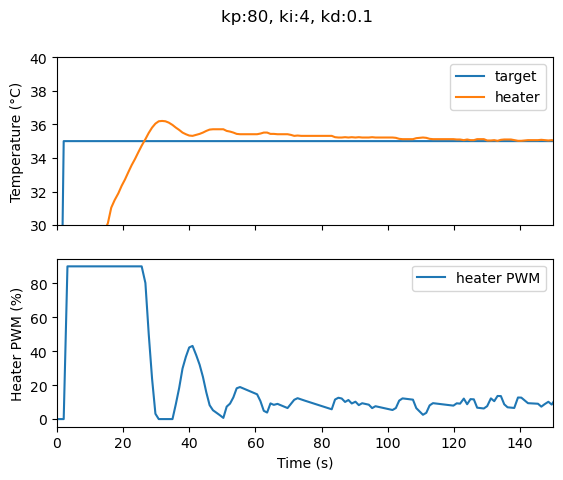

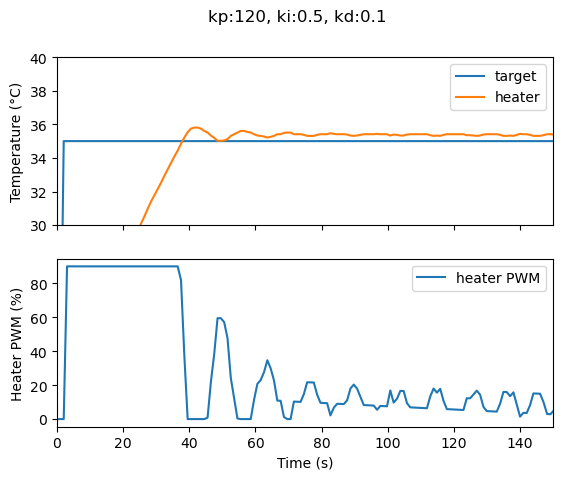

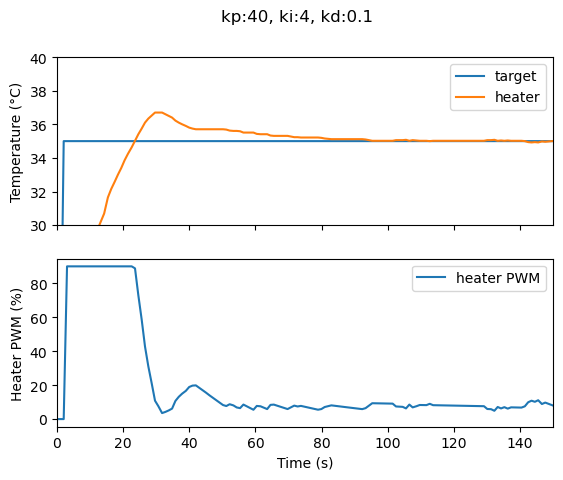

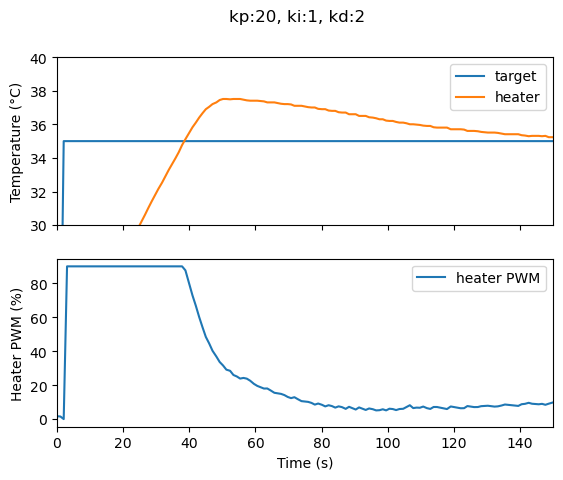

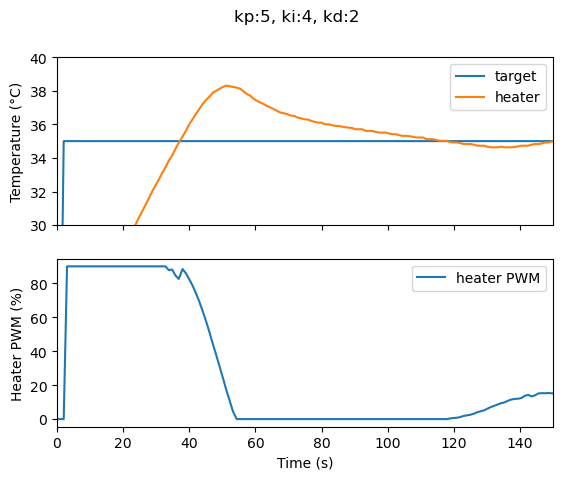

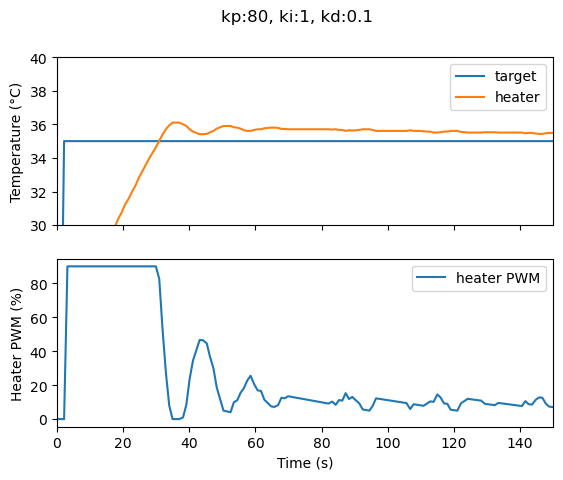

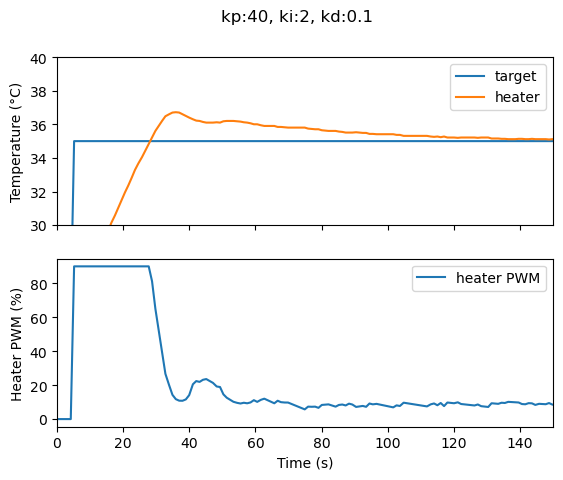

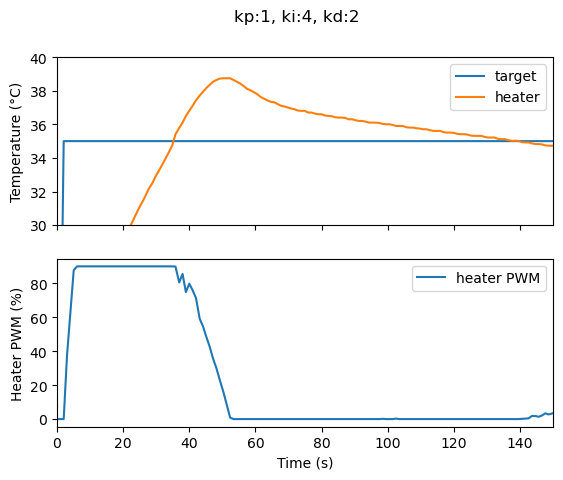

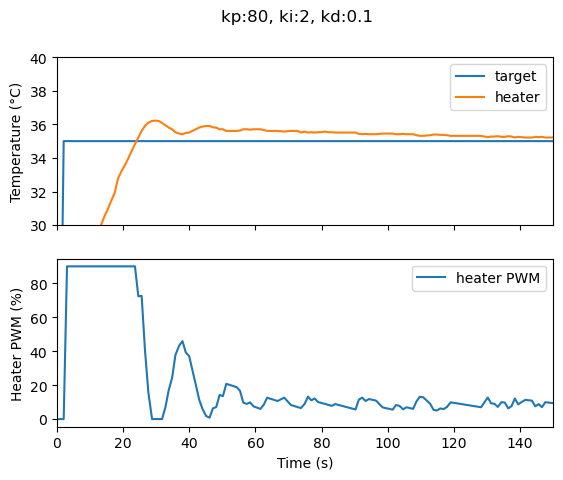

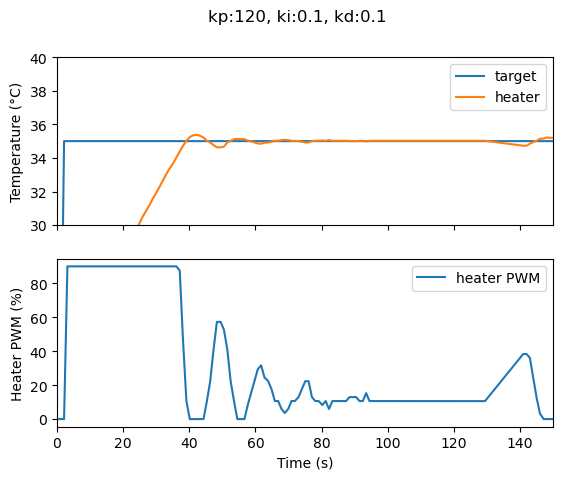

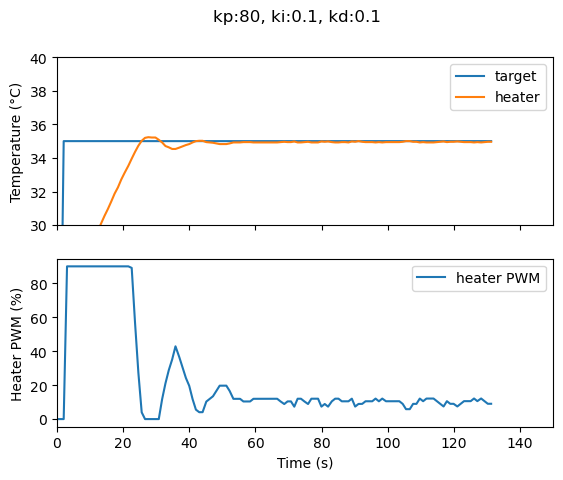

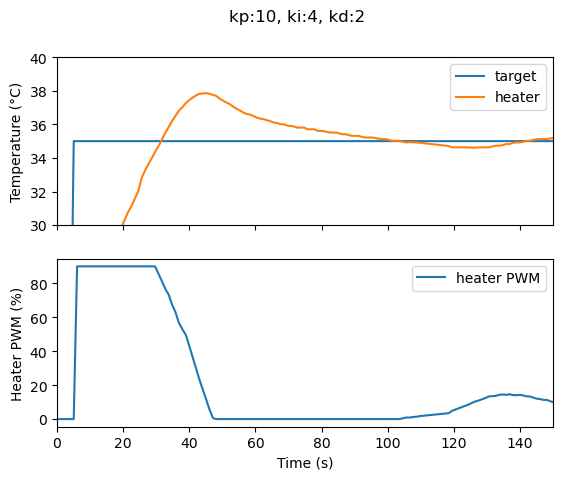

In [447]:
plot_dir = Path('test_plots')
plot_dir.mkdir(exist_ok=True)

for file in data_dir.glob('*.csv'):
    fig, axs = plot_log_file(file)
    axs[0].set(xlim= (0, 150), ylim= (30, 40))
    
    fig.savefig(plot_dir / f'{file.stem}.png')

In [254]:
ball_heater.stop_logging()
ball_heater.send_command('set_target_temp', [20])


(True, b'')

In [63]:
ball_heater.send_command('status')


(True,
 {'target_temp': 35.0,
  'ball_heater_pwm': 14.0635347366333,
  'heater_temp': 34.921783447265625,
  'aux_therm_temp': 37.102935791015625,
  'control_mode': 1})

In [29]:
# ball_heater.send_command('set_control_mode', [3])
ball_heater.send_command('set_heater_pwm_manual', [10])
ball_heater.send_command('status')

(True,
 {'target_temp': 14.5,
  'ball_heater_pwm': 10.0,
  'heater_temp': 22.310577392578125,
  'aux_therm_temp': 25.8128662109375,
  'control_mode': 3})

In [1]:
ball_heater.send_command('return_pid_parameters')

NameError: name 'ball_heater' is not defined

In [16]:
ball_heater.send_command('set_target_temp', [30])
ball_heater.send_command('status')

Exception in thread Thread-4:
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/py38/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/opt/homebrew/Caskroom/miniforge/base/envs/py38/lib/python3.8/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/jazzlw/src/ROS_ws/ball_heater_controller/ball_heater_controller/BallHeaterDriver.py", line 184, in logging_thread_call
    self.get_status_and_log()
  File "/Users/jazzlw/src/ROS_ws/ball_heater_controller/ball_heater_controller/BallHeaterDriver.py", line 204, in get_status_and_log
    data["time"] = time.time()
TypeError: 'bytes' object does not support item assignment


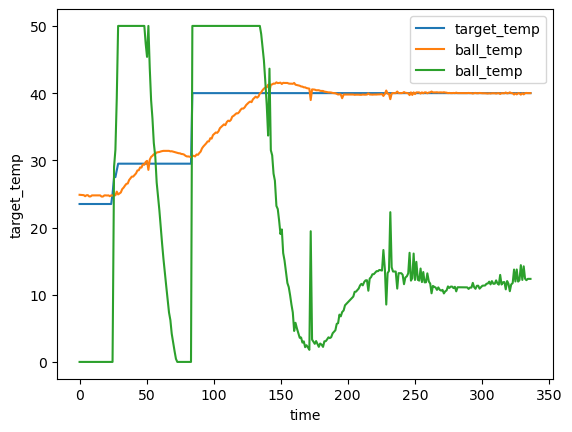

In [5]:


def plot_log_file(log_file_path):
    df = pd.read_csv(log_file_path)
    df['time'] = df['time'] - df['time'][0]    
    fig, ax = plt.subplots()
    sns.lineplot(data=df, x='time', y='target_temp', ax=ax, label='target_temp')
    sns.lineplot(data=df, x='time', y='heater_temp', ax=ax, label='ball_temp')
    sns.lineplot(data=df, x='time', y='ball_heater_pwm', ax=ax, label='ball_temp')
    
plot_log_file('test.csv')